In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) =mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image= X_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

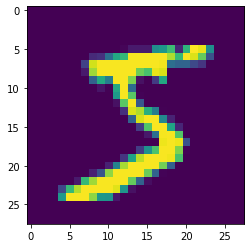

In [6]:
plt.imshow(single_image)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train.shape

(60000,)

In [10]:
y_example = to_categorical(y_train)

In [11]:
y_example.shape

(60000, 10)

In [12]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_train.shape

(60000, 10)

In [32]:
y_cat_test = to_categorical(y_test,num_classes =10)
y_cat_test.shape

(10000, 10)

In [33]:
X_train = X_train/255

In [34]:
X_test = X_test/255

In [35]:
scaled_image = X_train[0]

In [36]:
scaled_image.min()

0.0

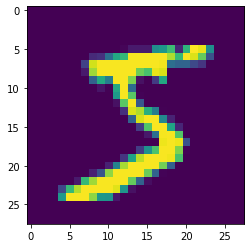

In [37]:
plt.imshow(scaled_image)

In [38]:
y_train.shape

(60000,)

In [39]:
X_train = X_train.reshape(60000,28,28,1)

In [40]:
X_test = X_test.reshape(10000,28,28,1)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [42]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size = (4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_loss',patience = 1)

In [45]:
model.fit(X_train,y_cat_train, epochs=10,validation_data = (X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7175 - accuracy: 0.7892 - val_loss: 0.3516 - val_accuracy: 0.8971
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3215 - accuracy: 0.9045 - val_loss: 0.2741 - val_accuracy: 0.9183
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2593 - accuracy: 0.9233 - val_loss: 0.2166 - val_accuracy: 0.9356
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2096 - accuracy: 0.9380 - val_loss: 0.1827 - val_accuracy: 0.9452
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1767 - accuracy: 0.9477 - val_loss: 0.1528 - val_accuracy: 0.9561
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1552 - accuracy: 0.9538 - val_loss: 0.1424 - val_accuracy: 0.9583
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1390 - accuracy: 0.9583 - val_loss: 0.1346 -

In [46]:
metrics= pd.DataFrame(model.history.history)

In [47]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.717479,0.789200,0.351625,0.8971
1,0.321503,0.904467,0.274071,0.9183
2,0.259254,0.923333,0.216559,0.9356
3,0.209587,0.937983,0.182733,0.9452
4,0.176727,0.947733,0.152769,0.9561
5,0.155191,0.953783,0.142372,0.9583
6,0.139032,0.958300,0.134612,0.9594
7,0.127327,0.961517,0.130543,0.9610
8,0.117335,0.964167,0.116414,0.9644
9,0.110060,0.966717,0.109011,0.9673


<AxesSubplot:>

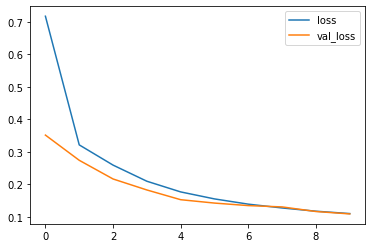

In [48]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

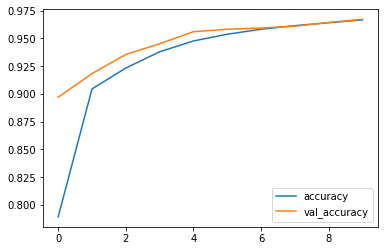

In [49]:
metrics[['accuracy','val_accuracy']].plot()

In [50]:
model.metrics_names

['loss', 'accuracy']

In [51]:
model.evaluate(X_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1090 - accuracy: 0.9673


[0.10901076346635818, 0.9672999978065491]

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
preds_prob = model.predict(X_test)

In [55]:
predictions = np.argmax(preds_prob,axis=1)
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.95      0.96       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [57]:
confusion_matrix(y_test,predictions)

array([[ 966,    1,    1,    1,    1,    1,    1,    1,    2,    5],
       [   0, 1122,    2,    1,    0,    1,    1,    3,    5,    0],
       [   6,    2, 1000,    2,    1,    0,    4,   10,    7,    0],
       [   0,    0,    4,  974,    1,    1,    0,    7,   18,    5],
       [   0,    0,    8,    0,  936,    1,    2,    5,    0,   30],
       [   3,    1,    1,   11,    1,  857,    4,    0,    8,    6],
       [   6,    3,    2,    1,    3,    6,  932,    1,    3,    1],
       [   1,    6,    8,    2,    3,    1,    0, 1000,    1,    6],
       [   3,    3,    2,   11,    7,    5,    3,    7,  928,    5],
       [   4,    4,    0,    9,   13,    5,    1,   12,    3,  958]],
      dtype=int64)

In [58]:
import seaborn as sns

<AxesSubplot:>

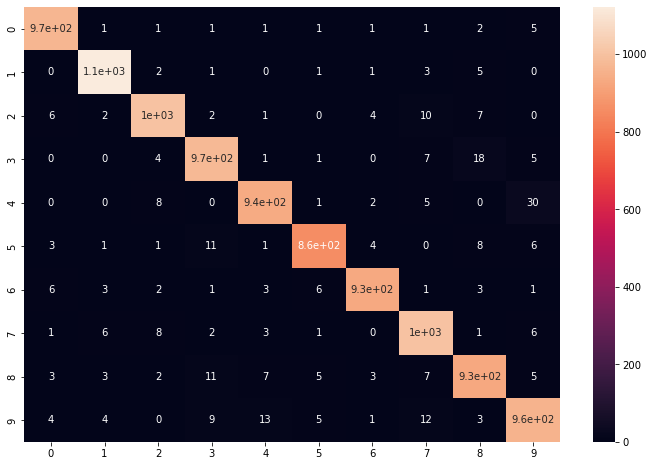

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [63]:
my_number =X_test[0]
my_number.shape

(28, 28, 1)

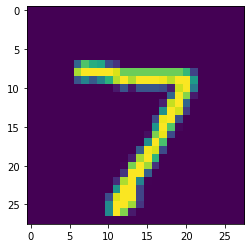

In [64]:
plt.imshow(my_number.reshape(28,28))

In [66]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))

In [70]:
predictions =np.argmax(pred_prob,axis=1)
predictions

array([7], dtype=int64)